

#      **Primera pre entrega - Análisis de datos con Python**








#***Introducción***

# Contexto
La vivienda en la India varía desde los palacios de los antiguos maharajás hasta los modernos edificios de apartamentos en las grandes ciudades y las pequeñas cabañas en las aldeas remotas. Ha habido un enorme crecimiento en el sector de la vivienda de la India a medida que han aumentado los ingresos. La Iniciativa de Medición de Derechos Humanos encuentra que India está haciendo el 60,9% de lo que debería ser posible en su nivel de ingresos por el derecho a la vivienda.

El arrendamiento, también conocido como alquiler o alquiler, es un acuerdo en el que se realiza un pago por el uso temporal de un bien, servicio o propiedad de otra persona. Un contrato de arrendamiento bruto es cuando el inquilino paga una cantidad fija de alquiler y el propietario paga todos los cargos de la propiedad en los que incurre regularmente el propietario. El alquiler puede ser un ejemplo de la economía colaborativa.

# Contenido
En este conjunto de datos, tenemos información sobre casi 4700+ casas/apartamentos/pisos disponibles para alquiler con diferentes parámetros como BHK, alquiler, tamaño, cantidad de pisos, tipo de área, localidad del área, ciudad, estado de mobiliario, tipo de inquilino preferido, N. de Baños, Contacto o tipo de rentador.

# Objetivo.
Trataremos de comprender cuales son los tipos de variantes que son determinantes para el precio de la vivienda ofertada, podremos seccionarlos y poder diferenciar cuales son las cualidades que seccionan cada vivienda y cuales son las mas conveniente en cuando precio-calidad.


# Glosario de conjuntos de datos (por columnas)

- BHK : Número de Dormitorios, Salón, Cocina.
- Renta : Renta de las Casas/Apartamentos/Piso.
- Tamaño : Tamaño de las Casas/Apartamentos/Piso en Pies Cuadrados.
- Planta : Casas/Apartamentos/Pisos situados en los que Planta y Número Total de Plantas (Ejemplo: Planta de 2, 3 de 5, etc.)
- Tipo de área : Tamaño de las casas/apartamentos/pisos calculado en Superárea o Área alfombrada o Área construida.
- Zona Localidad : Localidad de las Casas/Apartamentos/Pisos.
- Ciudad : Ciudad donde se ubican las Casas/Apartamentos/Pisos.
- Estado de Amueblamiento : Estado de Amueblamiento de las Casas/Apartamentos/Piso, ya sea Amueblado o Semi-Amoblado o Sin Amueblar.
- Inquilino Preferido : Tipo de Inquilino Preferido por el Propietario o Agente.
- Baño : Número de Baños.
- Punto de contacto : ¿A quién debe contactar para obtener más información sobre las casas/apartamentos/pisos?



# ***Data Wrangling.***

Llamo a las librerias potenciales a utilizar.

In [259]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid", palette="rocket")
%matplotlib inline

In [260]:
## Cargamos los datos y guardamos en un data frame...
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

df = pd.read_csv('/content/drive/MyDrive/House_Rent_Dataset.csv',index_col=0,sep=';')
df.head(5)

Mounted at /content/drive


,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
Posted On,,,,,,,,,,,
18/05/2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
13/05/2022,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
16/05/2022,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
04/07/2022,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
09/05/2022,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4746 entries, 18/05/2022 to 04/05/2022
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   Floor              4746 non-null   object
 4   Area Type          4746 non-null   object
 5   Area Locality      4746 non-null   object
 6   City               4746 non-null   object
 7   Furnishing Status  4746 non-null   object
 8   Tenant Preferred   4746 non-null   object
 9   Bathroom           4746 non-null   int64 
 10  Point of Contact   4746 non-null   object
dtypes: int64(4), object(7)
memory usage: 444.9+ KB


Podemos visualizar una tabla que indica el indice de numeros de columnas a la izquierda, nombre de todas la columnas, el numero de datos non-null y ademas el tipo de dato de cada columna. Ademas en la parte final se representa la memoria utilizada.

In [262]:
df.columns

Index(['BHK', 'Rent', 'Size', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom',
       'Point of Contact'],
      dtype='object')

Podemos visualizar las respectivas columnas del dataset.

In [263]:
columnas_nulos = df.columns[df.isnull().any()]
df[columnas_nulos].isnull().sum()

Series([], dtype: float64)

In [264]:
df.isnull().any()

BHK                  False
Rent                 False
Size                 False
Floor                False
Area Type            False
Area Locality        False
City                 False
Furnishing Status    False
Tenant Preferred     False
Bathroom             False
Point of Contact     False
dtype: bool

In [265]:
df.isna().sum()

BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

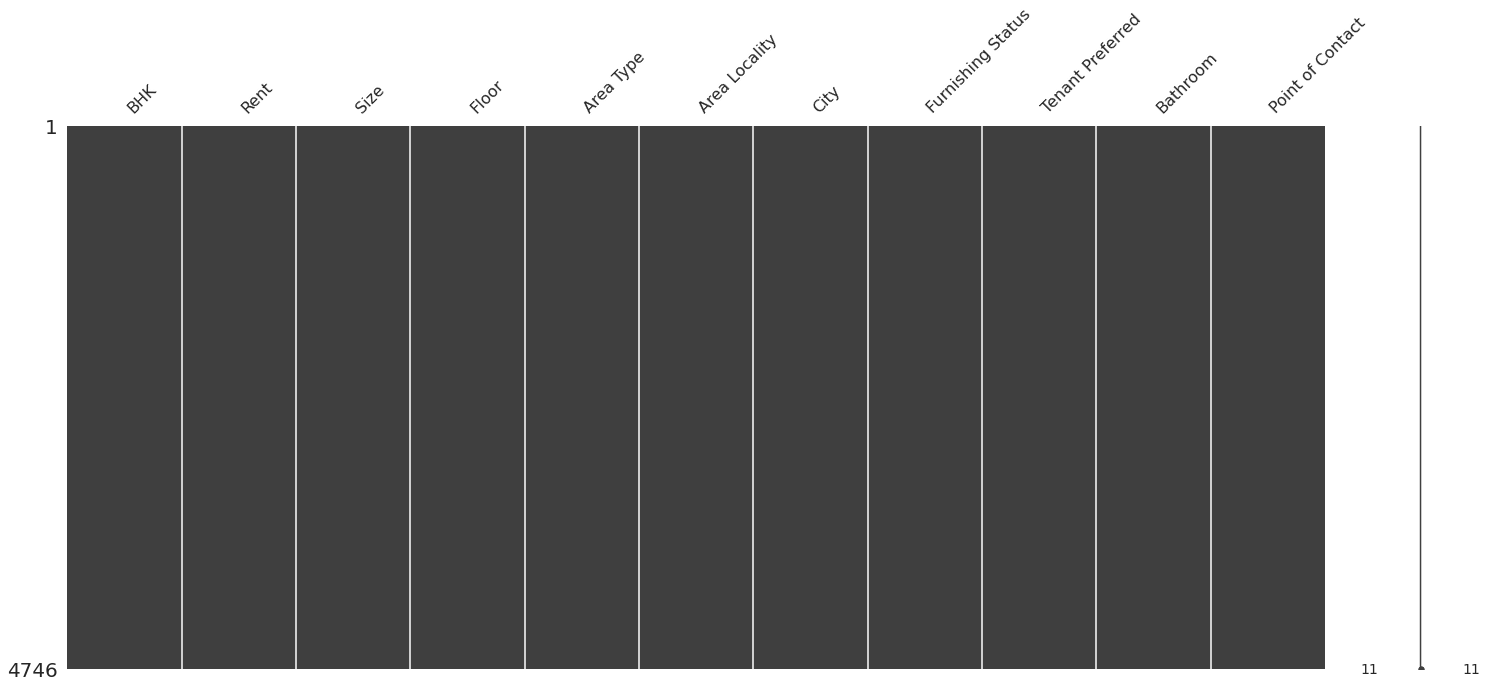

<Figure size 864x432 with 0 Axes>

In [266]:
import missingno as msno
msno.matrix(df)
plt.figure(figsize = (12,6))
plt.show()

Con diferentes metodos visualizamos que efectivamente no contamos con valores nulos o faltantes.

In [267]:
df.City.unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

Me parecio interesante visualizar todas las ciudades con ofertas del Dataset.

# Limpieza de los datos


Durante esta etapa realizaremos distintas operaciones de limpieza de datos sobre el dataset original para adecuar la información y poder realizar el análisis deseado.

Se eliminaron las características irrelevantes como la "Area Locality", "Furnishing Status" y	"Tenant Preferred",	 y se limpiaron los posibles outliers existentes en "Rent" y "Size" para facilitar nuestro análisis.

In [268]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


Analizaremos la variable "Rent":



In [269]:
df['Rent'].isna().value_counts()

False    4746
Name: Rent, dtype: int64

In [270]:
df['Rent'].describe()

count    4.746000e+03
mean     3.499345e+04
std      7.810641e+04
min      1.200000e+03
25%      1.000000e+04
50%      1.600000e+04
75%      3.300000e+04
max      3.500000e+06
Name: Rent, dtype: float64

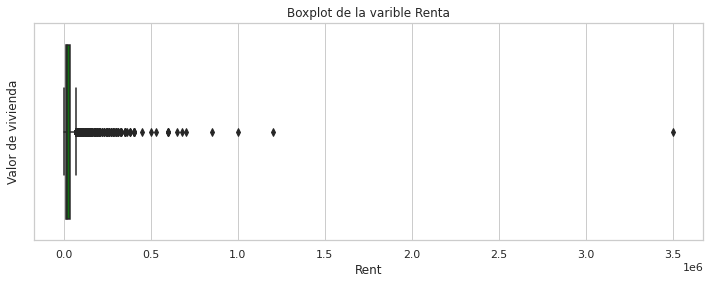

In [271]:
#Se grafica la variable "Rent" para detectar outliers porque se observó, con el método describe, que existe un valor outlier de 3500000 muy alejado del resto de valores.
fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.boxplot(x="Rent", data=df,color='green')               
ax.set_ylabel('Valor de vivienda')
plt.title('Boxplot de la varible Renta')
plt.show()

Podemos observar que en los percentiles superiores hay outliers y los datos no son congruentes, por lo que es necesario realizar alguna corrección.

In [272]:
#Veremos los Outliers y los analizaremos. Principalmente veremos los percentiles 10 y 90 e iremos cambiando para encontrar los outlier más distorsivos 
p10 = np.percentile(df['Rent'], 55)
p90 = np.percentile(df['Rent'], 90)

In [273]:
dfp10=df[(df['Rent'] <= p10)]
dfp10['Rent'].describe()

count     2687.000000
mean     10938.249721
std       3831.458048
min       1200.000000
25%       8000.000000
50%      10500.000000
75%      14000.000000
max      18000.000000
Name: Rent, dtype: float64

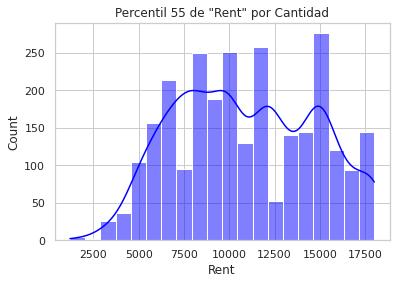

In [274]:
#Histograma de ingresos del percentil 55
sns.histplot(dfp10['Rent'], color='blue',kde=True).set(title='Percentil 55 de "Rent" por Cantidad')
plt.show()

In [275]:
dfp90=df[(df['Rent'] >= p90)]
dfp90['Rent'].describe()

count    4.790000e+02
mean     1.705983e+05
std      1.953407e+05
min      7.200000e+04
25%      9.000000e+04
50%      1.300000e+05
75%      1.900000e+05
max      3.500000e+06
Name: Rent, dtype: float64

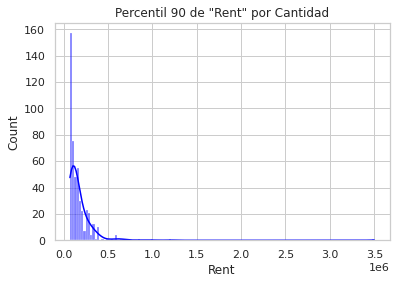

In [276]:
#Histograma de ingresos del percentil 90
sns.histplot(dfp90['Rent'],color='blue',kde=True).set(title='Percentil 90 de "Rent" por Cantidad')
plt.show()

Se eliminan los outliers más distorsivos para nuestro analisis

In [277]:
df= df[(df['Rent'] >= p10) & (df['Rent'] <= p90)]

In [278]:
df['Rent'].describe()

count     1713.000000
mean     33645.793345
std      14218.979397
min      18000.000000
25%      22000.000000
50%      30000.000000
75%      42000.000000
max      72000.000000
Name: Rent, dtype: float64

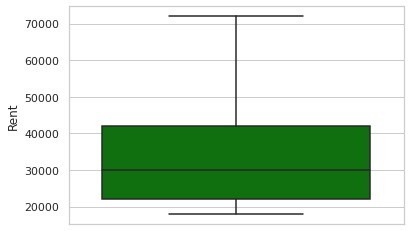

In [279]:
ax = sns.boxplot(y='Rent', data=df,color='green')

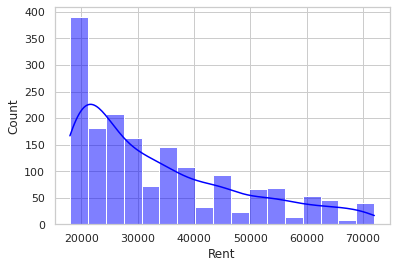

In [280]:
ax = sns.histplot(df['Rent'],color='blue',kde=True)
plt.show()

En los gráficos anteriores se observa que se logró obtener un histograma y un boxplot asimétricos que muestran que quedaron limpios de outliers.


Ahora realizaremos un análisis sobre la variable "Size":

In [281]:
df['Size'].describe()

count    1713.000000
mean     1099.967309
std       580.423262
min        25.000000
25%       680.000000
50%      1000.000000
75%      1465.000000
max      4200.000000
Name: Size, dtype: float64

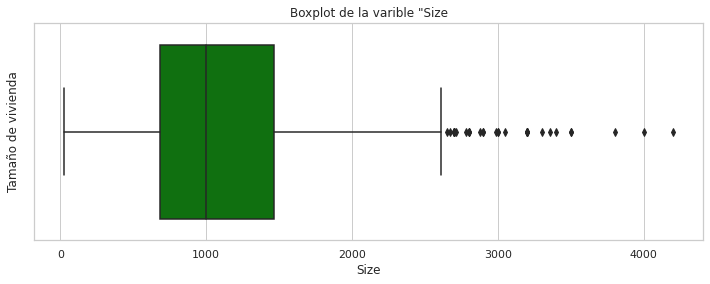

In [282]:
fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.boxplot(x="Size", data=df,color='green')               
ax.set_ylabel('Tamaño de vivienda')
plt.title('Boxplot de la varible "Size')
plt.show()

Podemos observar que en los percentiles superiores hay outliers y los datos no son congruentes, por lo que es necesario realizar alguna corrección.

In [283]:
#Veremos los Outliers y los analizaremos. Principalmente veremos los percentiles 10 y 90 e iremos cambiando para encontrar los outlier más distorsivos 
p10 = np.percentile(df['Size'], 40)
p90 = np.percentile(df['Size'], 60)

In [284]:
dfp10=df[(df['Size'] <= p10)]
dfp10['Size'].describe()

count    732.000000
mean     595.852459
std      212.975654
min       25.000000
25%      450.000000
50%      645.000000
75%      750.000000
max      900.000000
Name: Size, dtype: float64

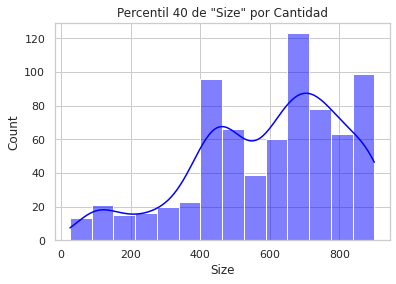

In [285]:
#Histograma de ingresos del percentil 40
sns.histplot(dfp10['Size'], color='blue',kde=True).set(title='Percentil 40 de "Size" por Cantidad')
plt.show()

In [286]:
dfp90=df[(df['Size'] >= p90)]
dfp90['Size'].describe()

count     705.000000
mean     1648.053901
std       451.704446
min      1150.000000
25%      1300.000000
50%      1550.000000
75%      1800.000000
max      4200.000000
Name: Size, dtype: float64

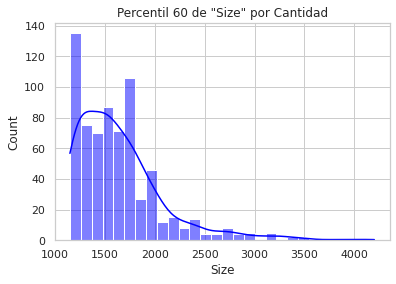

In [287]:
#Histograma de ingresos del percentil 60
sns.histplot(dfp90['Size'],color='blue',kde=True).set(title='Percentil 60 de "Size" por Cantidad')
plt.show()

In [288]:
df= df[(df['Size'] >= p10) & (df['Size'] <= p90)]

In [289]:
df['Size'].describe()

count     353.000000
mean     1022.668555
std        80.798188
min       900.000000
25%       950.000000
50%      1000.000000
75%      1100.000000
max      1150.000000
Name: Size, dtype: float64

Se eliminan los outliers más distorsivos para nuestro analisis

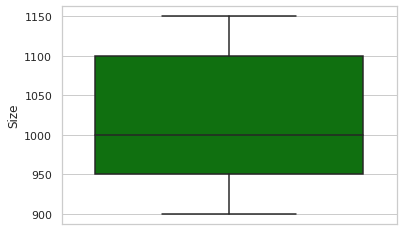

In [290]:
ax = sns.boxplot(y='Size', data=df,color='green')

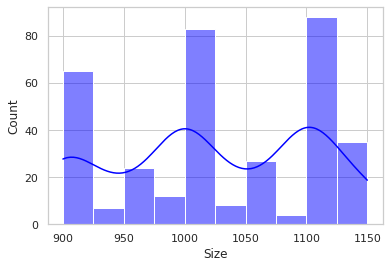

In [291]:
ax = sns.histplot(df['Size'],color='blue',kde=True)
plt.show()

En los gráficos anteriores se observa que se logró obtener un histograma y un boxplot simétricos que muestran que quedaron limpios de outliers.


Se observa que las características 'Posted On', 'Area Locality' y 'Tenant Preferred' no se cuentan con información relevante que influya en el precio de la vivienda. Por este motivo se procede a eliminarlos del dataset.

Se procedió a resetear el índice del dataset para luego eliminar la columna 'Posted On.

In [292]:
df=df.reset_index()
df.drop(['Posted On','Area Locality','Tenant Preferred'], axis = 1,  inplace = True)

In [293]:
df.head(5)

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Bathroom,Point of Contact
0,3,22000,1100,2 out of 3,Carpet Area,Kolkata,Unfurnished,1,Contact Owner
1,2,21000,900,1 out of 2,Carpet Area,Kolkata,Semi-Furnished,2,Contact Owner
2,6,20000,1000,1 out of 1,Super Area,Kolkata,Semi-Furnished,2,Contact Owner
3,2,20000,1000,1 out of 2,Super Area,Kolkata,Furnished,2,Contact Owner
4,2,25000,1100,2 out of 2,Super Area,Kolkata,Furnished,2,Contact Agent


In [294]:
df.shape

(353, 9)

In [295]:
data=pd.get_dummies(df, columns=None)

Finalmente obtenemos el dataset con información relevante que utilizaremos para nuestro analisis.
Se puede aprecinar una notable reducción de datos y características en comparación con el dataset original.

In [296]:
data

,BHK,Rent,Size,Bathroom,Floor_1 out of 1,Floor_1 out of 10,Floor_1 out of 11,Floor_1 out of 12,Floor_1 out of 2,Floor_1 out of 24,...,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Point of Contact_Contact Agent,Point of Contact_Contact Owner
0,3,22000,1100,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,2,21000,900,2,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
2,6,20000,1000,2,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
3,2,20000,1000,2,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
4,2,25000,1100,2,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,2,18000,1150,2,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
349,2,19000,1124,2,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
350,2,30000,1140,2,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
351,3,20000,1100,3,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1


# ***EDA - Exploratory Data Analysis 📊***

## ***Serie de preguntas***

*   ¿La cantidad de oferta-demanda en una ciudad afecta el precio de las viviendas? 
*   ¿Qué tan variante para el precio la Zona/Ciudad en la que se encuentra?
*   ¿Qué tanto afecta el precio la cantidad de baños que posee una vivienda?
*   ¿Qué tanto afecta al precio el tamaño de la vivienda?
*   ¿El hecho del contacto de la vivienda sea dueño directo o inmobiliaria cambia el precio?

##Análisis descriptivo e inferencial de las variables

Realizaremos una serie de preguntas e hipotesis sobre el dataset que intentaremos responder a traves de visualizaciones e interpretaciones de las mismas

###Feature: "Point of Contact"

Proporción de puntos de contacto encargados de las ventas de las viviendas:

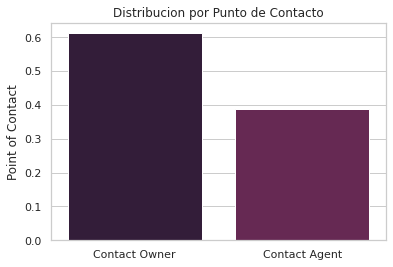

In [297]:
x=df["Point of Contact"].unique()
y=df["Point of Contact"].value_counts()/df["Point of Contact"].value_counts().sum()
ax=sns.barplot(x=x, y=y)
ax.set_title('Distribucion por Punto de Contacto')
plt.show()

Se puede observar que la mayoría de las viviendas (60% aproximadamente) son vendidas por su dueño directo, mientras que el resto (alrededor del 40%) son vendidas por algún agente inmobiliario. Más adelante veremos si esto tiene alguna relación con el precio de las viviendas.

###Feature: "Area Type"

Proporción de tipos de áreas relevantes que determinan la variación en el precio de las viviendas:

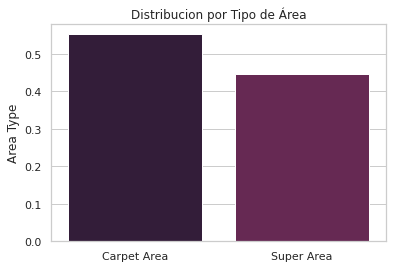

In [298]:
x=df["Area Type"].unique()
y=df["Area Type"].value_counts()/df["Area Type"].value_counts().sum()
ax=sns.barplot(x=x, y=y)
ax.set_title('Distribucion por Tipo de Área')
plt.show()

Se puede observar que en general existen dos tipos de área superficial relevantes en el precio de las viviendas, y que existe una distribución similar en ambos.


###Feature: "City"

Proporción de la oferta de viviendas por ciudad:

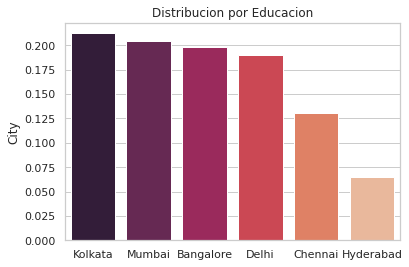

In [299]:
x=df["City"].unique()
y=df["City"].value_counts()/df["City"].value_counts().sum()
ax=sns.barplot(x=x, y=y)
ax.set_title('Distribucion por Educacion')
plt.show()

Podemos observar que existen ciudades con una importante oferta de viviendas, tales como Kolkata, Mumbai, Bangalore y Delhi, mientras que en otras ciudades como Hyderabad hay una notable reducción de la oferta de viviendas. Más adelante veremos si esta oferta tiene alguna relación con el precio de las viviendas.

###Feature: "Rent"

Proporción de la oferta de viviendas según sus valores:

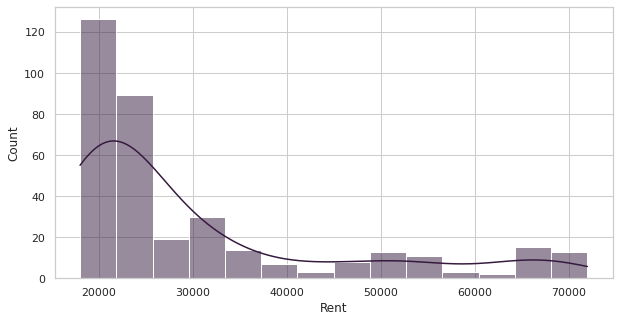

In [300]:
f, axs = plt.subplots(figsize=(10, 5))
ax = sns.histplot(x="Rent", data=df,kde=True)
plt.show()

Podemos observar que la cantidad de viviendas poseen un comportamiento bastante normalizado, con una asimetria izquierda. Se logra visualizar que existe un rango precios predominante en las vivendas de menor costo.

###Feature: "Furnishing Status"

Proporción de la oferta de viviendas según su amoblamiento:

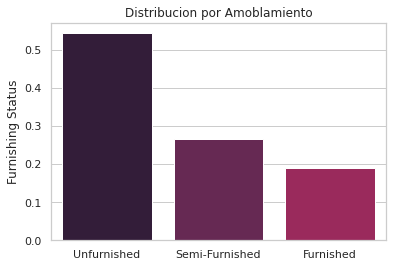

In [301]:
x=df["Furnishing Status"].unique()
y=df["Furnishing Status"].value_counts()/df["Furnishing Status"].value_counts().sum()
ax=sns.barplot(x=x, y=y)
ax.set_title('Distribucion por Amoblamiento')
plt.show()

Podemos observar que existen una importante oferta de viviendas sin amueblar (50% aproximadamente), mientras que el resto de viviendas existentes en el mercado estan ofrecidas amuebladas o semi-amuebladas.

###Feature: "BHK"

Proporción de la oferta de viviendas según la cantidad de ambientes:

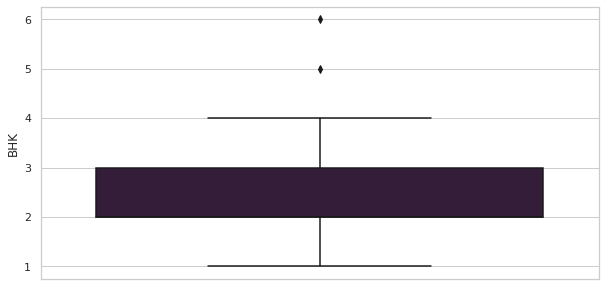

In [302]:
f, axs = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(y="BHK", data=df)
plt.show()

Podemos observar que predominan la oferta de viviendas que poseen entre 2 y 3 ambientes, con algunos extremos como 5 y 6 ambientes.

###Analisis bivariado/trivariado


####Relación entre las ciudades y el valor de las viviendas:

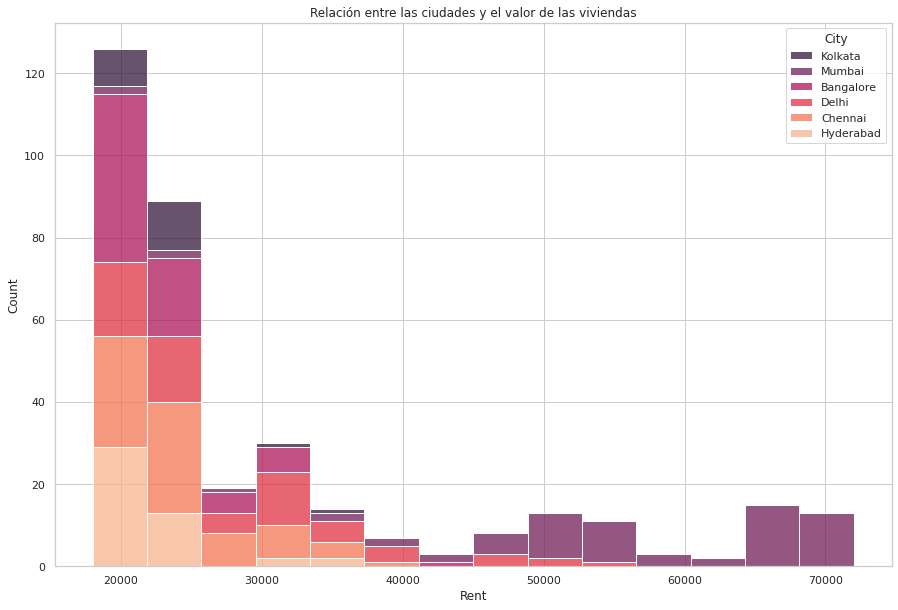

In [303]:
f, axs = plt.subplots(figsize=(15, 10))
sns.histplot(data=df, x="Rent", hue="City", multiple="stack").set(title='Relación entre las ciudades y el valor de las viviendas')
plt.show()

¿La cantidad de oferta-demanda en una ciudad afecta el precio de las viviendas? 
¿Qué tan variante para el precio la Zona/Ciudad en la que se encuentra?

En los graficos podemos visualizar una gran cantidad de ofertas de viviendas en las ciudades como Delhi, Chennai, Bangalore y Hyderabad.
Sin embargo, al visualizar el precio de la renta podemos notar que hay una dominancia en la parte alta de precio de renta en la ciudad de Mumbai, y en menor medida sucede lo mismo en la ciudad de Delhi. Por lo tanto, podemos concluir que la comparativa de oferta-demanda no es un factor razonable para este dataset debido a que efectivamente Mumbai no es la zona con mas ofertas pero si es la zona con la renta mas alta, consecuentemente nos lleva a indagar mas otros factores comparables para buscar razones del precio.

El gráfico de los precios de renta tambien nos ayuda tener una noción de los precios puntuales de cada ciudad, la cual nos genera mas cuestionamientos de la causalidad de los precios, tales como si en una zona céntrica (efectivamente Mumbai lo es), los precios de renta son mayores a comparación de las demas ciudades del dataset. Habría que investigar mas razones por la cuales el precio se eleva mucho o no en cada una de las ciudades.

####Relación entre el punto de contacto y el valor de las viviendas:

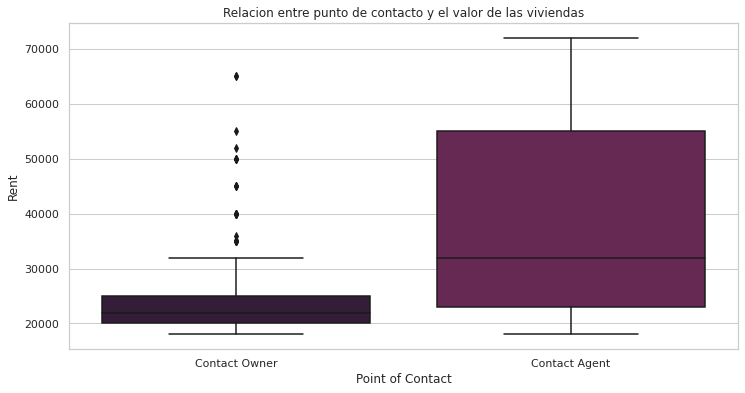

In [304]:
f, axs = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df, x="Point of Contact", y="Rent").set(title='Relacion entre punto de contacto y el valor de las viviendas')
plt.show()

Se puede notar una tendencia creciente en el valor de las viviendas cuando son ofrecidas por algún agente inmobiliario, mientras que si la venta es por dueño directo el valor de la vivienda suele ser menor, excepto en algunos casos aislados. Es fácil afirmar al punto de contacto como determinante del precio de las viviendas.

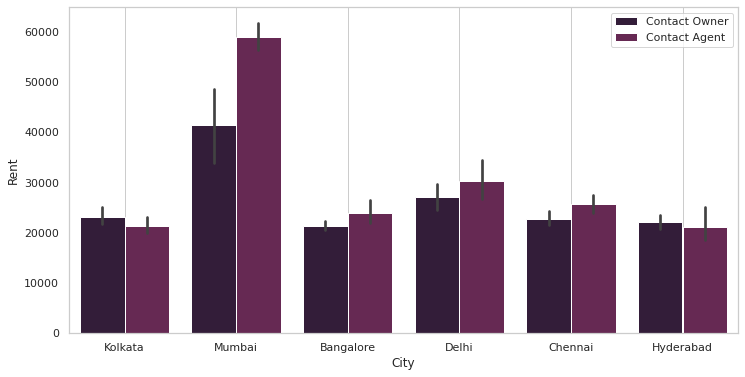

In [305]:
plt.figure(figsize=(12,6))
sns.barplot(x='City',y='Rent',hue='Point of Contact',data=df)
plt.legend()
plt.grid()

¿El hecho del contacto de la vivienda sea dueño directo o inmobiliaria cambia el precio?

Efectivamente a través del gráfico podemos visualizar el hecho de que si la vivienda es ofrecida por el agente inmobiliario, el precio se vuelve mas elevado, y confirmamos que suele ser mas barato contactar con el dueño directo de la vivienda para ahorrarse dinero.

En este gráfico encontramos un inusual en Kolkata y Hyderabad, en el cual el precio de la vivienda puede llegar a valores más elevados aún cuando es ofrecida por el dueño directo.

####Relacion entre cantidad de baños y el valor de las viviendas:

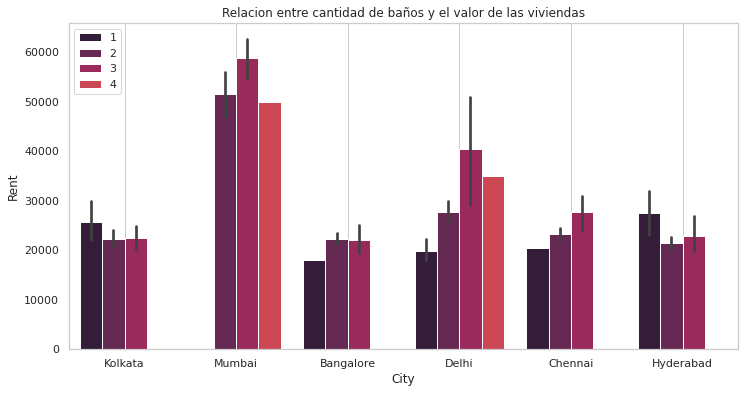

In [306]:
plt.figure(figsize=(12,6))
sns.barplot(x='City',y='Rent',hue='Bathroom',data=df).set(title='Relacion entre cantidad de baños y el valor de las viviendas')
plt.legend()
plt.grid()

¿Qué tanto afecta el precio la cantidad de baños que posee una vivienda?

En este gráfico podemos visualizar algo muy llamativo. La comparativa de las ciudades con la cantidad de baños y su relacion con los precios, en el que concluimos en cómo los precios de las viviendas se disparan en determinadas ciudades como Mumbai y Delhi, sin embargo, lo llamativo es que no necesariamente las viviendas con mayor cantidad de baños son aquellas que tienen un valor más elevado. 
Afirmamos que los baños son un factor que hacen variar los precios de las viviendas y los mismos se diferencian notoriamente a partir de los 2/3 baños por vivienda, pero no son un factor relevante que determinan que a mayor cantidad de baños aumenta el precio de la vivienda.

####Relacion entre tamaño y el valor de las viviendas:

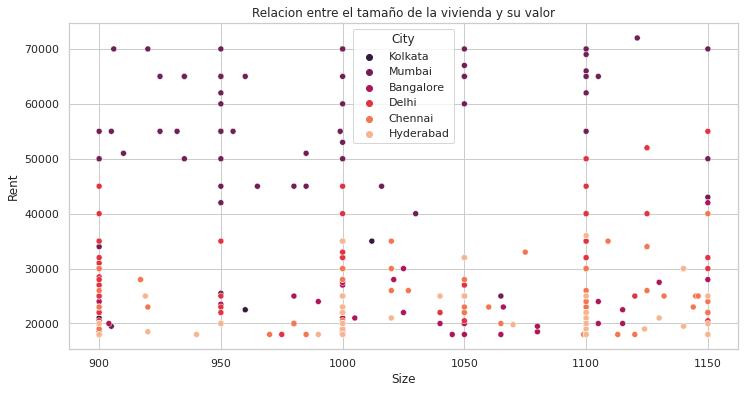

In [307]:
f, axs = plt.subplots(figsize=(12, 6))
sns.scatterplot(data=df, x="Size", y="Rent", hue='City').set(title='Relacion entre el tamaño de la vivienda y su valor')
plt.show()

¿Qué tanto afecta al precio el tamaño de la vivienda?

En el siguiente grafico vemos la relación entre el tamaño y el precio de las viviendas diferenciado por las ciudades. Podemos notar que los precios mas alejados corresponden a las ciudades mas caras, donde existen los tamaños de casas mas espaciosas. Se permite ver preponderancia de Mumbai donde cuentan con una tendencia de viviendas mas espaciosas, por ende es razonable que notemos cierta tendencia alcista en cuanto a los precios de las viviendas, y podemos afirmar que efectivamente el tamaño de la  vivienda es un factor determinante para el precio de la misma y permitiendo justificar la incógnita previa del por qué Mumbai presenta dominancia, en efecto una de las causalidades es que cuenta con las viviendas de mayor tamaño en potecial demanda de la misma.

#***Reducción de dimensionalidad***

## Implementacion usando funciones de Python


In [308]:
!pip install mlxtend 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [309]:
import statsmodels.api as sm
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [310]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=10,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

La función SequentialFeatureSelector() acepta los siguientes argumentos principales:

LinearRegression() es un estimador de todo el proceso. Del mismo modo, puede ser cualquier algoritmo basado en clasificación.

k_features indica el número de características que se seleccionarán. Puede ser cualquier valor aleatorio, pero el valor óptimo se puede encontrar analizando y visualizando las puntuaciones para diferentes números de características.

argumentos hacia adelante y flotantes forward = Verdadero y floating = Falso son para la técnica de selección hacia adelante.

El argumento de puntuación especifica el criterio de evaluación que se utilizará. Para problemas de regresión, solo hay una puntuación  r2  en la implementación predeterminada. De manera similar, para la clasificación, puede ser exactitud, precisión, recuperación, puntaje f1, etc.

El argumento cv es para la validación cruzada usando k-fold.

##Features Selection

Realizaremos un forward selection para la selección de características más relevantes para nuestra regresión.

Primero convertimos estos datos en un marco de datos que incluya la variable de destino y los datos reales junto con los nombres de las funciones.

In [311]:
df.columns

Index(['BHK', 'Rent', 'Size', 'Floor', 'Area Type', 'City',
       'Furnishing Status', 'Bathroom', 'Point of Contact'],
      dtype='object')

In [312]:
df2=df[['BHK', 'Rent', 'Size', 'Floor', 'Area Type', 'City',
       'Furnishing Status', 'Bathroom', 'Point of Contact']]

In [313]:
#Reemplazamos las letras por 0 y 1 para luego poder aplicar correctamente nuestra regresión. 
df2["Point of Contact"]=df2["Point of Contact"].replace("Contact Owner",1)
df2["Point of Contact"]=df2["Point of Contact"].replace("Contact Agent",0)
df2

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Bathroom,Point of Contact
0,3,22000,1100,2 out of 3,Carpet Area,Kolkata,Unfurnished,1,1
1,2,21000,900,1 out of 2,Carpet Area,Kolkata,Semi-Furnished,2,1
2,6,20000,1000,1 out of 1,Super Area,Kolkata,Semi-Furnished,2,1
3,2,20000,1000,1 out of 2,Super Area,Kolkata,Furnished,2,1
4,2,25000,1100,2 out of 2,Super Area,Kolkata,Furnished,2,0
...,...,...,...,...,...,...,...,...,...
348,2,18000,1150,4 out of 5,Super Area,Hyderabad,Semi-Furnished,2,1
349,2,19000,1124,1 out of 5,Super Area,Hyderabad,Furnished,2,1
350,2,30000,1140,5 out of 5,Super Area,Hyderabad,Furnished,2,1
351,3,20000,1100,2 out of 5,Super Area,Hyderabad,Semi-Furnished,3,1


In [314]:
#Convertimos a variables numéricas aquellas características que son categóricas para aplicar correctamente nuestra regresión.
df3 = pd.get_dummies(df2, columns=[ 'Area Type','Floor', 'City', 'Furnishing Status'], drop_first = True)
df3

,BHK,Rent,Size,Bathroom,Point of Contact,Area Type_Super Area,Floor_1 out of 10,Floor_1 out of 11,Floor_1 out of 12,Floor_1 out of 2,...,Floor_Upper Basement out of 10,Floor_Upper Basement out of 3,Floor_Upper Basement out of 9,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished
0,3,22000,1100,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2,21000,900,2,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
2,6,20000,1000,2,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,2,20000,1000,2,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,2,25000,1100,2,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,2,18000,1150,2,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
349,2,19000,1124,2,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
350,2,30000,1140,2,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
351,3,20000,1100,3,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [315]:
X = df3.drop('Rent', 1)       # feature matrix
y = df3['Rent']               # target feature
y.head()

0    22000
1    21000
2    20000
3    20000
4    25000
Name: Rent, dtype: int64

Realizamos una evaluación en donde podemos observar qué tan bien explican las características seleccionadas los datos del modelo. Para ello, podemos observar los valores del r2.

In [316]:
sfs.fit(X, y)
sfs.k_feature_names_    #Lista final de features

('Size',
 'Point of Contact',
 'Floor_10 out of 14',
 'Floor_12 out of 25',
 'Floor_14 out of 40',
 'Floor_15 out of 15',
 'Floor_16 out of 32',
 'Floor_7 out of 7',
 'City_Delhi',
 'City_Mumbai')

In [317]:
model1 = sm.OLS(y, sm.add_constant(df3[['Size',
 'Point of Contact',
 'Floor_10 out of 14',
 'Floor_12 out of 25',
 'Floor_14 out of 40',
 'Floor_15 out of 15',
 'Floor_16 out of 32',
 'Floor_7 out of 7',
 'City_Delhi',
 'City_Mumbai']])).fit()
print(model1.pvalues)

const                 4.145358e-01
Size                  3.437525e-05
Point of Contact      2.099660e-05
Floor_10 out of 14    6.183256e-03
Floor_12 out of 25    1.339021e-03
Floor_14 out of 40    8.186121e-03
Floor_15 out of 15    1.011798e-05
Floor_16 out of 32    1.008153e-04
Floor_7 out of 7      3.432608e-06
City_Delhi            6.420783e-10
City_Mumbai           1.046399e-99
dtype: float64


In [318]:
model1.rsquared_adj

0.7896463517507564

##Forward Selection

In [319]:
import warnings
warnings.filterwarnings("ignore")

def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [320]:
forward_selection(X,y)

['City_Mumbai',
 'Point of Contact',
 'City_Delhi',
 'Floor_7 out of 7',
 'Size',
 'Floor_15 out of 15',
 'Floor_16 out of 32',
 'Floor_12 out of 25',
 'Floor_10 out of 14',
 'Floor_14 out of 40',
 'Furnishing Status_Semi-Furnished',
 'Furnishing Status_Unfurnished',
 'BHK',
 'Floor_3 out of 4']

Realizamos una evaluación en donde podemos observar qué tan bien explican las características seleccionadas por la selección hacia adelante de los datos del modelo. Para ello, podemos observar los valores del r2.

In [321]:
model2 = sm.OLS(y, sm.add_constant(df3[['City_Mumbai',
 'Point of Contact',
 'City_Delhi',
 'Floor_7 out of 7',
 'Size',
 'Floor_15 out of 15',
 'Floor_16 out of 32',
 'Floor_12 out of 25',
 'Floor_10 out of 14',
 'Floor_14 out of 40',
 'Furnishing Status_Semi-Furnished',
 'Furnishing Status_Unfurnished',
 'BHK',
 'Floor_3 out of 4']])).fit()
print(model2.pvalues)

const                               2.142793e-01
City_Mumbai                         2.112620e-96
Point of Contact                    2.550445e-06
City_Delhi                          4.966932e-11
Floor_7 out of 7                    5.615478e-06
Size                                2.232212e-04
Floor_15 out of 15                  1.193535e-06
Floor_16 out of 32                  1.251394e-04
Floor_12 out of 25                  2.085337e-03
Floor_10 out of 14                  5.074216e-04
Floor_14 out of 40                  1.711393e-02
Furnishing Status_Semi-Furnished    4.545873e-06
Furnishing Status_Unfurnished       6.938967e-05
BHK                                 2.857741e-03
Floor_3 out of 4                    4.820455e-03
dtype: float64


In [322]:
model2.rsquared_adj

0.8072760074068519

Podemos concluir al observar el r2 ajustado que utilizando las características más relevantes obtenidas con la reducción de dimensionalidad pudimos obtener un r2 del 81% aproximadamente.

#Metricas algoritmos de clasificación

Realizamos el entrenamiento de nuestros datos y luego obetnemos las prediciones del modelo. Utilizamos un gráfico de confusión para visualizar el desempeño del algoritmo.

In [323]:
X=df3[['City_Mumbai',
 'City_Delhi',
 'Floor_7 out of 7',
 'Size',
 'Floor_15 out of 15',
 'Floor_16 out of 32',
 'Floor_12 out of 25',
 'Floor_10 out of 14',
 'Floor_14 out of 40',
 'Furnishing Status_Semi-Furnished',
 'Furnishing Status_Unfurnished',
 'BHK',
 'Floor_3 out of 4']]

In [324]:
 y=df3['Point of Contact']  

In [325]:
X

,City_Mumbai,City_Delhi,Floor_7 out of 7,Size,Floor_15 out of 15,Floor_16 out of 32,Floor_12 out of 25,Floor_10 out of 14,Floor_14 out of 40,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,BHK,Floor_3 out of 4
0,0,0,0,1100,0,0,0,0,0,0,1,3,0
1,0,0,0,900,0,0,0,0,0,1,0,2,0
2,0,0,0,1000,0,0,0,0,0,1,0,6,0
3,0,0,0,1000,0,0,0,0,0,0,0,2,0
4,0,0,0,1100,0,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,0,0,0,1150,0,0,0,0,0,1,0,2,0
349,0,0,0,1124,0,0,0,0,0,0,0,2,0
350,0,0,0,1140,0,0,0,0,0,0,0,2,0
351,0,0,0,1100,0,0,0,0,0,1,0,3,0


<Figure size 864x432 with 0 Axes>

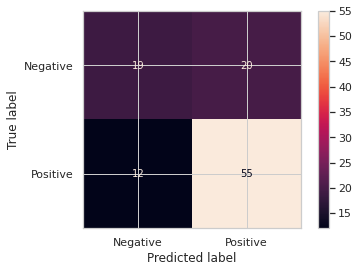

In [326]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Separamos en entrenamiento/test en razon 70/30 %
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

# Creamos un modelo Random Forest con parametros por defecto
modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)

# Obtenemos las predicciones del modelo con X_test
y_pred = modelo.predict(X_test) 

plt.figure(figsize=(12,6))
metrics.plot_confusion_matrix(modelo, X_test, y_test, display_labels=['Negative', 'Positive'],cmap="rocket")

In [327]:
# Exactitud se puede evaluar para cada categoria
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy 

0.6981132075471698

In [328]:
# Precision se puede evaluar para cada categoria
precision_positiva = metrics.precision_score(y_test, y_pred, pos_label=1)
precision_negativa = metrics.precision_score(y_test, y_pred, pos_label=0)
precision_positiva, precision_negativa 

(0.7333333333333333, 0.6129032258064516)

In [329]:
# Recall se puede evaluar para cada categoria
recall_sensibilidad = metrics.recall_score(y_test, y_pred, pos_label=1)
recall_especificidad= metrics.recall_score(y_test, y_pred, pos_label=0)
recall_sensibilidad, recall_especificidad

(0.8208955223880597, 0.48717948717948717)

In [330]:
# F1 se puede evaluar para cada categoria
f1_positivo = metrics.f1_score(y_test, y_pred, pos_label=1)
f1_negativo = metrics.f1_score(y_test, y_pred, pos_label=0)
f1_positivo, f1_negativo 

(0.7746478873239437, 0.5428571428571428)

In [331]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.49      0.54        39
           1       0.73      0.82      0.77        67

    accuracy                           0.70       106
   macro avg       0.67      0.65      0.66       106
weighted avg       0.69      0.70      0.69       106



In [332]:
confusion = metrics.confusion_matrix(y_test, y_pred)
confusion.ravel()

array([19, 20, 12, 55])

In [333]:
#Resumen de metricas con formulas a partir de la matriz obtenida
VN=confusion[0,0]
VP=confusion[1,1]
FN=confusion[1,0]
FP=confusion[0,1]

sensibilidad=VP/float(VP+FN)
especificidad=VN/float(VN+FP)
Precision=VP/float(VP+FP)
Accuracy=(VP+VN)/float(VP+FP+FN+VN)

print('Sensibilidad:', sensibilidad)
print('Especificidad:', especificidad)
print('Precision:', Precision)
print('Accuracy:', Accuracy)

Sensibilidad: 0.8208955223880597
Especificidad: 0.48717948717948717
Precision: 0.7333333333333333
Accuracy: 0.6981132075471698


Nuestra matriz de confusión nos muestra que el modelo clasifica bien la no ocurrencia, lo que se ve reflejado con una precisión del modelo del 73%. En cambio, no es buen predictor de los casos negativos, ya que tiene una especificidad del 49%, o sea que solo clasifica bien los casos negativos en la mitad de las veces.
Ademas el total de elementos clasificados correctamente es del 70%. 

Podemos concluir al observar los valores de precisión y recall (sensibilidad) que el modelo en general maneja muy bien la clasificación de los distintos casos.

Al realizar una evaluación del desempeño de nuestro algoritmo pudimos ver qué tipos de aciertos y errores tuvo nuestro modelo, logrando una exactitud (accuracy) del 91% total de elementos clasificados correctamente.
En términos de aciertos y errores, el algoritmo apenas obtuvo 24 falsos positivos, y 60 falsos negativos, mientras que logró alcanzar 615 verdaderos positivos y 251 verdaderos negativos.

Podemos concluir al observar el F1-Score, y los altos valores de precisión y recall que el modelo maneja muy bien esa clase.
